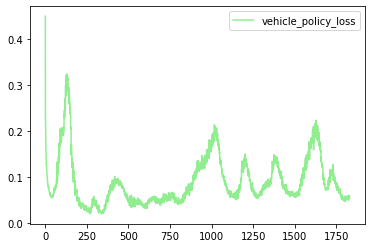

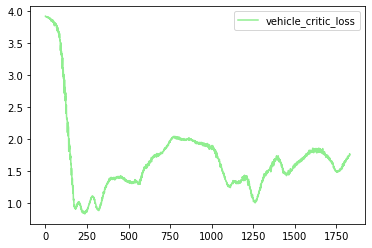

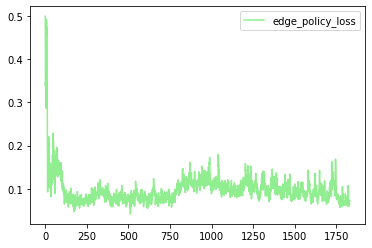

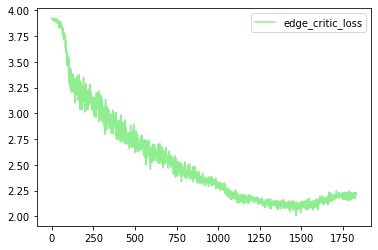

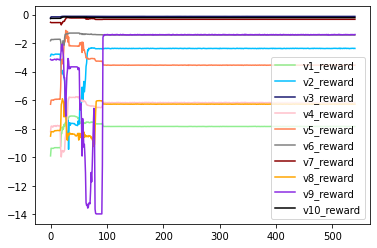

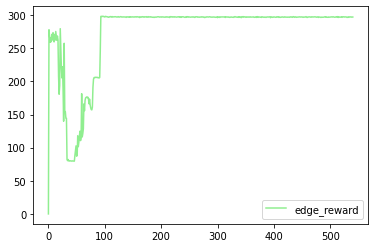

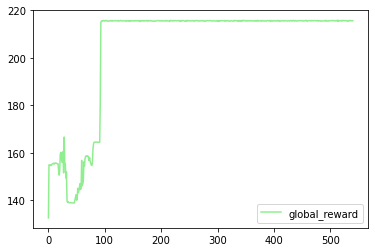

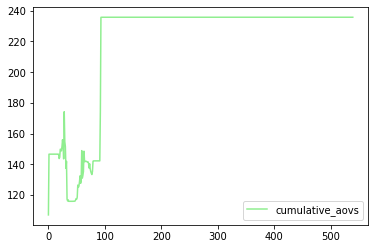

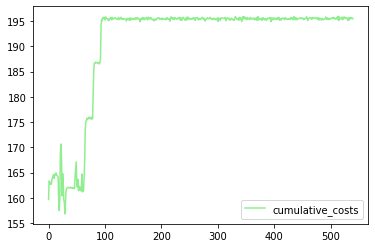

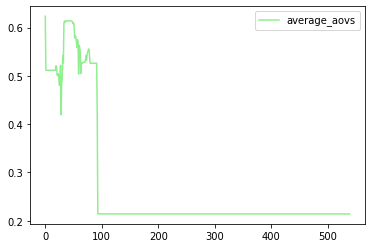

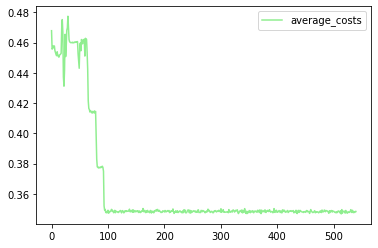

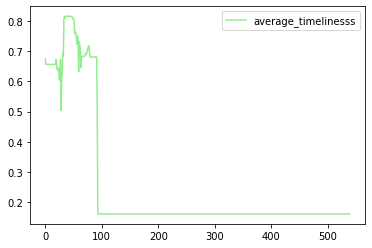

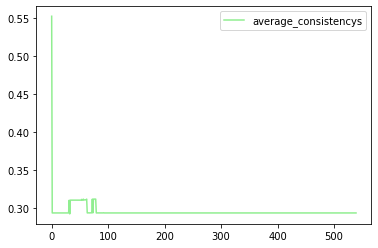

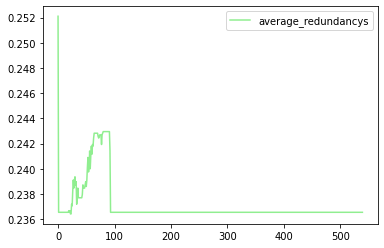

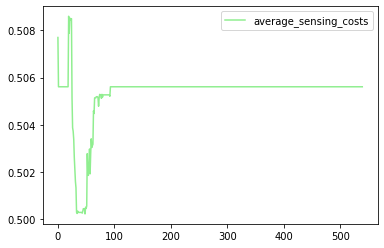

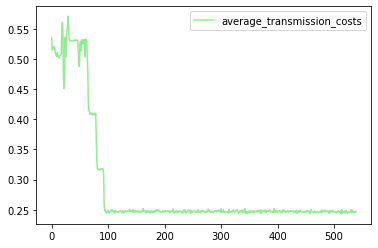

********************************
cumulative_aovs:  235.77988501263317
cumulative_costs:  195.98183319824787
average_aovs:  0.2140670499578898
average_costs:  0.3467272226725075
average_timelinesss:  0.1610926368892769
average_consistencys:  0.293528669560809
average_redundancys:  0.2365384615384617
average_sensing_costs:  0.5056128348603285
average_transmission_costs:  0.2429359910517098
********************************
cumulative_aovs:  235.78094665655658
cumulative_costs:  195.50748126256022
average_aovs:  0.21406351114481142
average_costs:  0.3483083957914659
average_timelinesss:  0.16108673886747962
average_consistencys:  0.2935286695608089
average_redundancys:  0.23653846153846161
average_sensing_costs:  0.5056128348603285
average_transmission_costs:  0.24688892384910582


In [2]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# scenario=1
file_name = "/home/neardws/acme/4d58be28-0b51-11ed-88f4-04d9f5632a58/"
# scenario=3
# file_name = "/home/neardws/acme/0c3c080e-0b52-11ed-9d36-04d9f5632a58/"

# different bandwidth 
# # bandwidth = 1
file_name = "/home/neardws/acme/ecc6fde2-0bc1-11ed-8df8-04d9f5632a58/"
# # bandwidth = 1.5
file_name = "/home/neardws/acme/db857bae-0bf2-11ed-b773-04d9f5632a58/"
# # # bandwidth=2 power=100 number=10
file_name = "/home/neardws/acme/adcb38be-0807-11ed-9d49-04d9f5632a58/"
# # # bandwidth = 2.5
file_name = "/home/neardws/acme/403cb6e8-0c07-11ed-8125-04d9f5632a58/"
# # # bandwidth = 3
file_name = "/home/neardws/acme/5e0a2e30-0c07-11ed-af98-04d9f5632a58/"

# number = 6
file_name = "/home/neardws/acme/ab1358b2-0e1b-11ed-99a3-04d9f5632a58/"
# number = 8
file_name = "/home/neardws/acme/f630206e-0e1b-11ed-9690-04d9f5632a58/"
# number = 12
file_name = "/home/neardws/acme/13b4e3ae-0e1c-11ed-83d9-04d9f5632a58/"
# number = 14
file_name = "/home/neardws/acme/304a64d0-0e1c-11ed-99e3-04d9f5632a58/"

loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"

loss_df = pd.read_csv(loss_file_name, names=["edge_critic_loss", "edge_policy_loss", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime",  "vehicle_critic_loss", "vehicle_policy_loss"], header=0)

vehicle_policy_loss = loss_df["vehicle_policy_loss"].values.tolist()
epoch_index = [i for i in range(len(vehicle_policy_loss))]
plt.plot(epoch_index, vehicle_policy_loss, '-', color='lightgreen', label='vehicle_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

vehicle_critic_loss = loss_df["vehicle_critic_loss"].values.tolist()
plt.plot(epoch_index, vehicle_critic_loss, '-', color='lightgreen', label='vehicle_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_policy_loss = loss_df["edge_policy_loss"].values.tolist()
plt.plot(epoch_index, edge_policy_loss, '-', color='lightgreen', label='edge_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_critic_loss = loss_df["edge_critic_loss"].values.tolist()
plt.plot(epoch_index, edge_critic_loss, '-', color='lightgreen', label='edge_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

returns_df = pd.read_csv(returns_file_name, names=["average_aovs", "average_consistencys", "average_costs", "average_redundancys", "average_sensing_costs", "average_timelinesss", "average_transmission_costs", "cumulative_aovs", "cumulative_costs", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "label", "steps_per_second"], header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 12))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").replace("\n", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        f_s = float(s)
        returns[ret_index][int(index)] = f_s

epoch_index = [i for i in range(episode_return.shape[0])]

v1_return = returns[:, 0].tolist()
v2_return = returns[:, 1].tolist()
v3_return = returns[:, 2].tolist()
v4_return = returns[:, 3].tolist()
v5_return = returns[:, 4].tolist()
v6_return = returns[:, 5].tolist()
v7_return = returns[:, 6].tolist()
v8_return = returns[:, 7].tolist()
v9_return = returns[:, 8].tolist()
v10_return = returns[:, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1_reward')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2_reward')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3_reward')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4_reward')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5_reward')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6_reward')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7_reward')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8_reward')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9_reward')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10_reward')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge_reward')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global_reward')
plt.legend(loc="best")  # 图例
plt.show()

start_index = 0
end_index = -1
epoch_index = epoch_index[start_index: end_index]
cumulative_aovs = returns_df["cumulative_aovs"].values
cumulative_costs = returns_df["cumulative_costs"].values
average_aovs = returns_df["average_aovs"].values
average_costs = returns_df["average_costs"].values
average_timelinesss = returns_df["average_timelinesss"].values
average_consistencys = returns_df["average_consistencys"].values
average_redundancys = returns_df["average_redundancys"].values
average_sensing_costs = returns_df["average_sensing_costs"].values
average_transmission_costs = returns_df["average_transmission_costs"].values

# returns_df["cumulative_aovs"].to_csv("mad4pg_aov.csv")
# returns_df["cumulative_costs"].to_csv("mad4pg_cov.csv")

plt.plot(epoch_index, cumulative_aovs[start_index:end_index], '-', color='lightgreen', label='cumulative_aovs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, cumulative_costs[start_index:end_index], '-', color='lightgreen', label='cumulative_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_aovs[start_index:end_index], '-', color='lightgreen', label='average_aovs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_costs[start_index:end_index], '-', color='lightgreen', label='average_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_timelinesss[start_index:end_index], '-', color='lightgreen', label='average_timelinesss')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_consistencys[start_index:end_index], '-', color='lightgreen', label='average_consistencys')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_redundancys[start_index:end_index], '-', color='lightgreen', label='average_redundancys')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_sensing_costs[start_index:end_index], '-', color='lightgreen', label='average_sensing_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_transmission_costs[start_index:end_index], '-', color='lightgreen', label='average_transmission_costs')
plt.legend(loc="best")  # 图例
plt.show()


# print("cumulative_aovs: ", cumulative_aovs[start_index:end_index].mean())
# print("cumulative_costs: ", cumulative_costs[start_index:end_index].mean())
# print("average_aovs: ", average_aovs[start_index:end_index].mean())
# print("average_costs: ", average_costs[start_index:end_index].mean())
# print("average_timelinesss: ", average_timelinesss[start_index:end_index].mean())
# print("average_consistencys: ", average_consistencys[start_index:end_index].mean())
# print("average_redundancys: ", average_redundancys[start_index:end_index].mean())
# print("average_sensing_costs: ", average_sensing_costs[start_index:end_index].mean())
# print("average_transmission_costs: ", average_transmission_costs[start_index:end_index].mean())
print("*"*32)

max_value = 0
max_index = 0
for i in range(len(cumulative_aovs)):
    if cumulative_aovs[i] + cumulative_costs[i] > max_value:
        max_value = cumulative_aovs[i] + cumulative_costs[i]
        max_index = i

# max_index = cumulative_aovs.argmax()
# max_index = cumulative_costs.argmax()
print("cumulative_aovs: ", cumulative_aovs[max_index])
print("cumulative_costs: ", cumulative_costs[max_index])
print("average_aovs: ", average_aovs[max_index])
print("average_costs: ", average_costs[max_index])
print("average_timelinesss: ", average_timelinesss[max_index])
print("average_consistencys: ", average_consistencys[max_index])
print("average_redundancys: ", average_redundancys[max_index])
print("average_sensing_costs: ", average_sensing_costs[max_index])
print("average_transmission_costs: ", average_transmission_costs[max_index])

print("*"* 32)
start_index = 250
end_index = -1
print("cumulative_aovs: ", cumulative_aovs[start_index:end_index].mean())
print("cumulative_costs: ", cumulative_costs[start_index:end_index].mean())
print("average_aovs: ", average_aovs[start_index:end_index].mean())
print("average_costs: ", average_costs[start_index:end_index].mean())
print("average_timelinesss: ", average_timelinesss[start_index:end_index].mean())
print("average_consistencys: ", average_consistencys[start_index:end_index].mean())
print("average_redundancys: ", average_redundancys[start_index:end_index].mean())
print("average_sensing_costs: ", average_sensing_costs[start_index:end_index].mean())
print("average_transmission_costs: ", average_transmission_costs[start_index:end_index].mean())
